In [3]:
#things to import to make the notebook work
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pylab
import matplotlib.ticker as mtick
import numpy as np
from scipy.integrate import solve_ivp
from scipy.ndimage.filters import uniform_filter1d
from scipy.interpolate import interp1d
import random
!wget http://kavassalis.space/s/Lorenz96_plotter.py
from Lorenz96_plotter import plot_Lorenz96 #if this breaks, that's on me!
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

--2022-03-29 07:57:45--  http://kavassalis.space/s/Lorenz96_plotter.py
Resolving kavassalis.space (kavassalis.space)... 198.185.159.145, 198.49.23.144, 198.49.23.145, ...
Connecting to kavassalis.space (kavassalis.space)|198.185.159.145|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://kavassalis.space/s/Lorenz96_plotter.py [following]
--2022-03-29 07:57:46--  https://kavassalis.space/s/Lorenz96_plotter.py
Connecting to kavassalis.space (kavassalis.space)|198.185.159.145|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/61ae9885d7103a326c42a062/t/62415938ddee2d421e18bc9a/1648449848522/Lorenz96_plotter.py [following]
--2022-03-29 07:57:47--  https://static1.squarespace.com/static/61ae9885d7103a326c42a062/t/62415938ddee2d421e18bc9a/1648449848522/Lorenz96_plotter.py
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238,

# Lorenz 96 Model
The Lorenz 96 Model is a one-dimensional atmospheric toy model with $K$ variables, $X_1$,...,$X_K$, governed by the equations,
\begin{align}
\Large\frac{dX_k}{dt}=-X_{k-2}X_{k-1} + X_{k-1}X_{k+1} -X_k + F
\end{align}
with cyclic boundary conditions,
\begin{align}
\Large X_{k-K}=X_{k+K}=X_k
\end{align}
The indices, $k$=1,...,$K$ can be thought to represent locations along a <a href="https://oceanservice.noaa.gov/facts/longitude.html">latitudinal band</a> around the globe and the X's to represent some atmospheric quantity (like temperature) at those locations.


![worldmap.png](http://kavassalis.space/s/worldmap.png)


These equations may seem a bit arbitrary, but this model is widely used because it exhibits a lot of the same behaviour found in real models used for numerical weather prediction and climate simulation. We can assign meaning to the terms in the equations that match up with terms in more complex models.


$\Large F$ is the external forcing, $\Large X_k$ is internal dissipation, and $\Large -X_{k-2}X_{k-1} + X_{k-1}X_{k+1}$ simulates advection (movement of heat or matter horizontally).

The below image shows how to view this 1D grid if $K$=36. Each $X_k$ is the value of $X$ within the $k^{th}$ grid box (and rememember this 1D grid is actually on a sphere, so it wraps around).

![lat_lon_Keq36.png](http://kavassalis.space/s/lat_lon_Keq36.png)

Run the below code to create the Lorenz 96 model in Python. In Google Colab, you can press the play button (triangle) at the top left of the code box. You may need to scroll to the top of this page and run the box with the import statements if you haven't already.

In [4]:
def lorenz96(X, t, K, F):
        #K-component Lorenz 96 model
        dX_dt = np.zeros(K)
        # boundary conditions
        dX_dt[0] = (X[1] - X[K-2]) * X[K-1] - X[0] + F
        dX_dt[1] = (X[2] - X[K-1]) * X[0] - X[1] + F
        dX_dt[K-1] = (X[0] - X[K-3]) * X[K-2] - X[K-1] + F
        # Then the general case
        for i in range(2, K-1):
            dX_dt[i] = (X[i+1] - X[i-2]) * X[i-1] - X[i] + F
        # Return the state derivatives
        return dX_dt
    
def run_Lorenz96(K=36, F=8, number_of_days=30, nudge=True):
    X0 = F * np.ones(K)  # Initial state (equilibrium)
    if nudge==True: X0[random.randint(1, K)-1]=X0[random.randint(1, K)-1]+random.uniform(0,.01) # adds our perturbation
    t = np.arange(0.0, number_of_days, 0.01) # creates the time points we want to see solutiosn for

    X = odeint(lorenz96, X0, t, args=(K,F)) #solves the system of ordinary differential equations
    
    return t, X, F, K, number_of_days #gives us the output

<IPython.core.display.Javascript object>

## Let's look at what happens when we run our toy model of the atmosphere starting from an equilibrium state (ie. uniform $X$ all over the "globe").

Run the below code box and look at the plot that is generated.

In [ ]:
t, X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=50, nudge=False)
plot_Lorenz96(False, True, X, t, F, K, number_of_days)

## Now, let's look at what happens when we give our atmosphere a little nudge 🦋
### 1a.  Run the Lorenz96 model a couple of times by running the below code block and look at how the spatial plot has changed. 

What is happening here? Was there any logical reason behind the times the time slices are displaying?

In [ ]:
t, X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=50)
plot_Lorenz96(False, True, X, t, F, K, number_of_days)

## Try looking at this a few different ways
### 1b. The below command will make a 2D plot showing time on one axis and longitude on the other. 

Discuss:  What features can you see here that the time slices above didn't show? Which of the two spatial plots is more intuitive to understand?

In [ ]:
plot_Lorenz96(False, True, X, t, F, K, number_of_days, twoD_latplot=True)

## We'll come back together to discuss atmospheric waves!

## Let's look at the time series now. These are the plots that show the time variation in $X$ at a particular point on the globe. The below code will show you what $X$ looks like at $k=0$.

In [ ]:
plot_Lorenz96(True, False, X, t, F, K, number_of_days)

### 2. Try changing the length of the simulation. This means you're have to re-run the Lorenz model. 

This platform can only handle so much (and the integration isn't all that optimized), so keep the number of days below 1000. Try some different values out and see if anything interesting comes up.

In [ ]:
t, X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=500)
plot_Lorenz96(True, False, X, t, F, K, number_of_days)

We'll talk about model spin-up!

### You can get extra time series plots by running the below command if you want a close up on the start and end of the time period you're simulating.

In [ ]:
plot_Lorenz96(True, False, X, t, F, K, number_of_days, extra_ts_plots=True)

### You can also plot a time series of the global average of $X$ instead of $X$ at a specific point.
This "global average" idea is important, and often what you see presented for climate model output. What information do we get from global averages that we don't get from looking at $X$ at specific locations?

In [ ]:
plot_Lorenz96(True, False, X, t, F, K, number_of_days, global_avg=True)

## 3.  There are two key parameters in the Lorenz96 model, $K$, and $F$. First, try changing $K$. This changes the "resolution" of the model. Is there an optimal resolution? What criteria could we use for selecting this value?

In [ ]:
t,  X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=50)
plot_Lorenz96(False, True, X, t, F, K, number_of_days)

### When the Lorenz96 model is used to demonstrate properties of Earth's atmosphere, almost always $K$ is chosen as 36 or 40. Why might that be? 

## 4.  Now try changing $F$, the forcing. This is what changes the dynamics. Try a few different values (F=1, F=2.5, F=8, F=10) and think in what way are the atmospheres they describe different? Are any of them more realistic than others?

### Pick which plots you would want to look at to answer this. How long should your simulations be to really see how different these atmospheres are?

In [ ]:
t,  X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=50)
plot_Lorenz96(True, False, X, t, F, K, number_of_days, global_avg=True)
#plot_Lorenz96(True, False, X, t, F, K, number_of_days)
#plot_Lorenz96(False, True, X, t, F, K, number_of_days)
#plot_Lorenz96(False, True, X, t, F, K, number_of_days, twoD_latplot=True)

## Some of these simulations have a lot of variability! What can we learn from that variability? 
Let's run an ensemble simulation. That means we run the model with the same basic conditions (same K, same F) but we change our initial conditions just slightly. If we imagine a real model of the atmosphere, it makes sense that our knowledge of initial conditions (ie. the current state of the atmosphere when you run the model) will be imperfect. So let's try allowing the value of that initial random perturbation to vary just a bit and see what happens. If you see where the variation occurs below in the code, you can tell that it's very small.

In [ ]:
def run_Lorenz96_ensemble(K=36, F=8, number_of_days=30, ensemble_size=15, perturbation=True):
    t = np.arange(0.0, number_of_days, 0.01)
    
    #preallocating the array we want to store all our simulations
    X_ensemble = np.empty((ensemble_size,len(t), K))
    
    X0 = F * np.ones(K)  # Initial state (equilibrium)
        
    l=random.randint(1, K)-1
    for i in range(ensemble_size):
        if perturbation == True: X0[l]=X0[l]+random.uniform(0,.01)
        X_ensemble[i] = odeint(lorenz96, X0, t, args=(K,F))
    
    return t, X_ensemble, F, K, number_of_days

In [ ]:
t, X_ensemble, F, K, number_of_days = run_Lorenz96_ensemble(K=36, F=8, number_of_days=50, ensemble_size=15, perturbation=True)
plot_Lorenz96(False, True, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=False, ensemoff=False)
plot_Lorenz96(True, False, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=False, ensemoff=False)

## Try changing those $F$ values again and seeing what you can see! We can plot some basic statistics to help us see what's going on better. 

In [ ]:
plot_Lorenz96(False, True, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=True, ensemoff=True)
plot_Lorenz96(True, False, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=True, ensemoff=True)

In [ ]:
plot_Lorenz96(False, True, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=False, median=True, ensemoff=True)
plot_Lorenz96(True, False, X_ensemble, t, F, K, number_of_days, extra_ts_plots=True, mean=False, median=True, ensemoff=True)

## Some big questions to think about here. How can we think about predictability for a potentially chaotic system like this? How many ensemble members should we have? How far our can we "forecast" for a given $F$ value? Can we say anything about "weather" vs "climate"?

In [ ]:
plot_Lorenz96(True, False, X_ensemble, t, F, K, number_of_days, mean=True, ensemoff=True, global_avg=True)

### This ensemble is more like the kind used to make weather predictions. What is the 'ensemble' used in climate predictions? It's different in a major way!

## 5. How do we think about changing forcing?
### Let's run a couple more scenarios to plot different $F$ solutions on the same plot. 


In [5]:
K=36;
number_of_days=200;
ensemble_size=5 # a small ensemble for the sake of computational time constraints

#all simulations need same initial condition
X0 = 2.5 * np.ones(K)  # Initial state (equilibrium)
X0[random.randint(1, K)-1]=X0[random.randint(1, K)-1]+random.uniform(0,.01)

t  = np.arange(0.0, number_of_days, 0.01)    
#preallocating the array we want to store all our simulations
X_big_ensemble = np.empty((5, ensemble_size,len(t), K))

# storing each of the 5 scenarios in 1 large data structure
for i in range(ensemble_size):
    X_big_ensemble[0][i] = odeint(lorenz96, X0, t, args=(K, 1)) #F =1
for i in range(ensemble_size):
    X_big_ensemble[1][i] = odeint(lorenz96, X0, t, args=(K, 2.5)) #F = 2.5
for i in range(ensemble_size):
    X_big_ensemble[2][i] = odeint(lorenz96, X0, t, args=(K, 4.5)) #F = 4.5
for i in range(ensemble_size):
    X_big_ensemble[3][i] = odeint(lorenz96, X0, t, args=(K, 8)) # F = 8
for i in range(ensemble_size):
    X_big_ensemble[4][i] = odeint(lorenz96, X0, t, args=(K, 10)) #F = 10

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ensemble mean + standard deviation


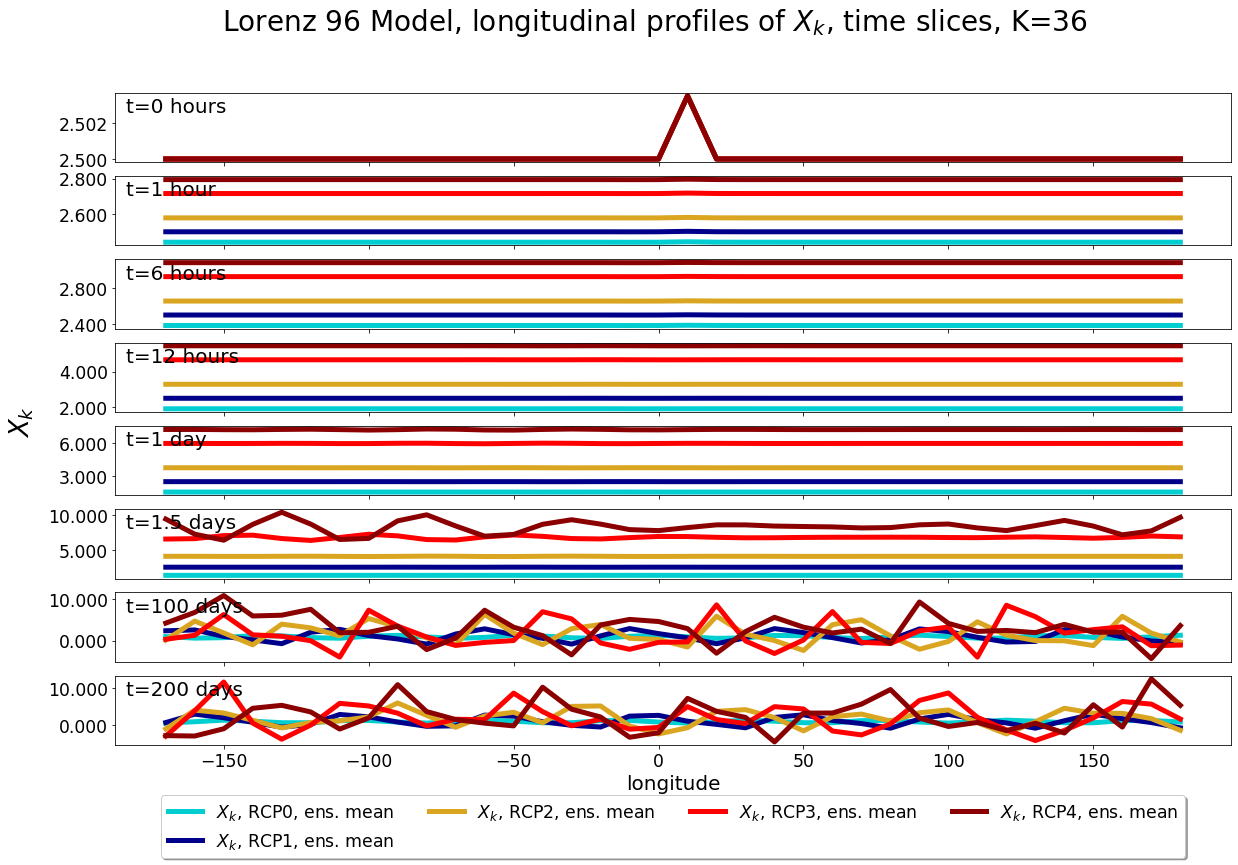

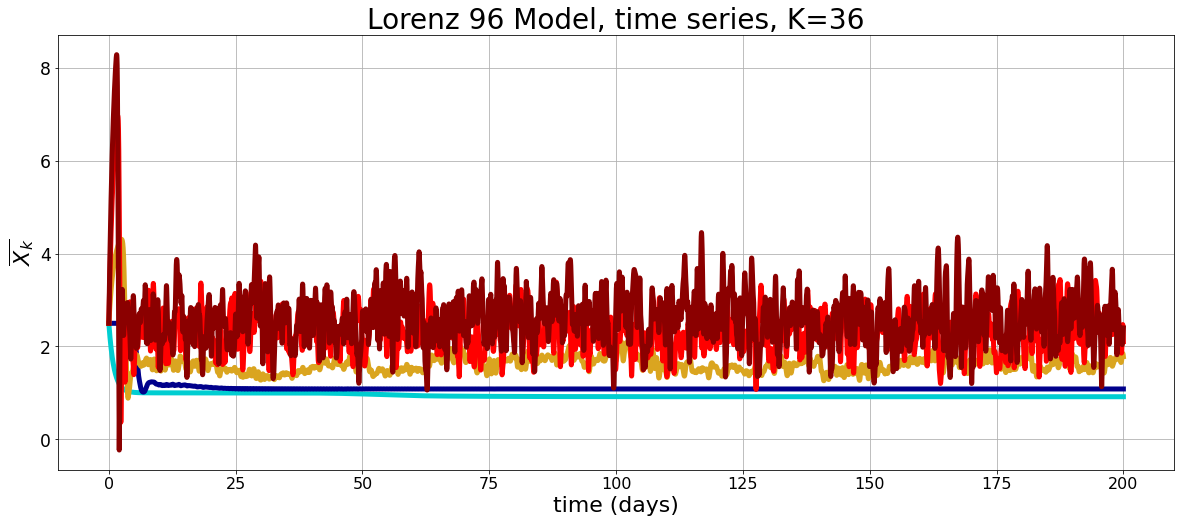

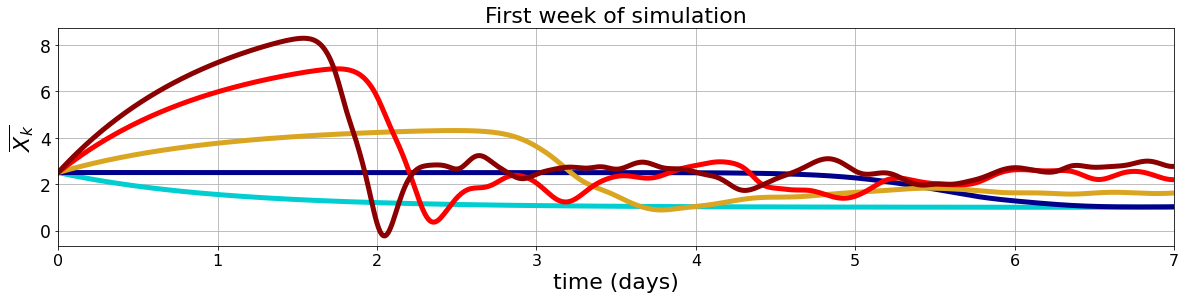

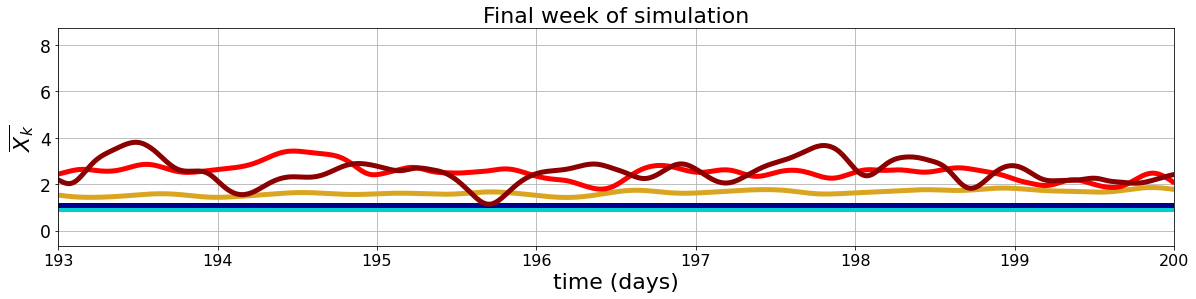

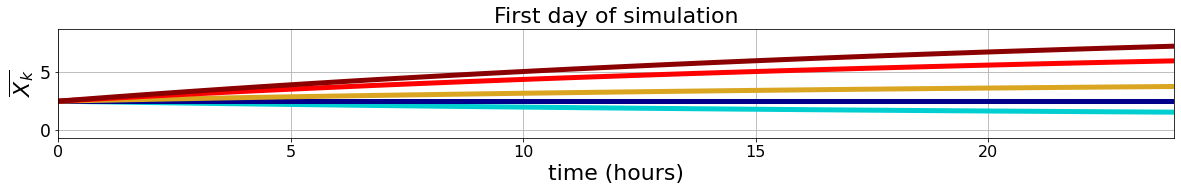

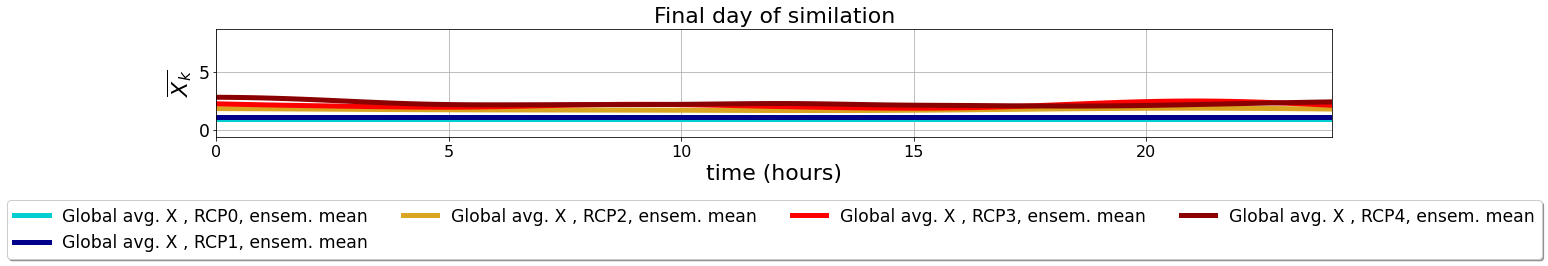

ensemble mean + standard deviation


In [7]:
plot_Lorenz96(False, True, X_big_ensemble, t, 2.5, K, number_of_days, mean=True, extra_ts_plots=True, ensemoff=True)
plot_Lorenz96(True, False, X_big_ensemble, t, 2.5, K, number_of_days, mean=True, extra_ts_plots=True, ensemoff=True, global_avg=True)

## 5. Now, the real climate system isn't just an atmosphere, it's the full coupled Earth system!
We can describe a slightly more complex version of the Lorenz96 model that includes two distinct layers coupled together, each possessing different characteristic timescales.
\begin{align}
\Large\frac{dX_k}{dt}&=\Large-X_{k-2}X_{k-1} + X_{k-1}X_{k+1} -X_k + \frac{hc}{b}Y_k + F \\
\Large\frac{dY_k}{dt}&=\Large-cbY_{k+1}Y_{k+2} + Y_{k-1}Y_{k+1} -cY_k + \frac{hc}{b}X_k
\end{align}
The coupling constants, $c$, $b$, and $h$ can be tuned to achieve different behaviour. 

In [ ]:
def lorenz96_coupled(X, t, K, F, c, b, h):
        dX_dt = np.zeros(K*2)
        
        ######## first##########
        # boundary conditions
        dX_dt[0] = (X[1] - X[K-2]) * X[K-1] - X[0]  -(h*c/b)*X[K] + F
        dX_dt[1] = (X[2] - X[K-1]) * X[0] - X[1]  -(h*c/b)*X[K+1] + F
        dX_dt[K-1] = (X[0] - X[K-3]) * X[K-2] - X[K-1]  -(h*c/b)*X[K-1] + F
        ######## second next #############
         # boundary conditions
        dX_dt[K+0] = -c*b*(X[K+2]-X[K+K-1]) * X[K+1] - c*X[K] + (h*c/b)*X[0]
        dX_dt[K+1] = -c*b*(X[K+1+2]-X[K]) * X[K+1+1] - c*X[K+1] + (h*c/b)*X[1]
        dX_dt[K+K-1] = -c*b*(X[K+1]-X[K+K-2]) * X[K] - c*X[K+K-1] + (h*c/b)*X[K-1]
        dX_dt[K+K-2] = -c*b*(X[K+2]-X[K+K-3]) * X[K+K-1] - c*X[K+K-2] + (h*c/b)*X[K-2]
        
        ######### first first ######################
        # Then the general case
        for i in range(2, K-1):
            dX_dt[i] = (X[i+1] - X[i-2]) * X[i-1] - X[i] -(h*c/b)*X[i+K] + F
        # Return the state derivatives
        ######## second next #############################
        for i in range(K+2, K + K - 2):
            dX_dt[i] = -c*b*(X[i+2]-X[i-1]) * X[i+1] - c*X[i] + (h*c/b)*X[i-K]
            
        return dX_dt
    
def run_Lorenz96_coupled(K=36, F=8, c=10, b=10, h=1, number_of_days=30):

    X0 = np.concatenate((F * np.ones(K), (h*c/b)*np.ones(K)))  # Initial state (equilibrium)
    X0[random.randint(0, K)-1]=X0[random.randint(0, K)-1]+random.uniform(0,.01)
    t = np.arange(0.0, number_of_days, 0.01)

    X = odeint(lorenz96_coupled, X0, t, args=(K,F,c,b,h))
    
    return t, X, F, K, number_of_days

## Try out the coupled modelled. Try some different values for $c$, $b$, and $h$. $c$ and $b$ to figure out what they do. First, just vary one, say, $c$ (try different values like 10, 1, and .1). 

### If we wanted to simulate the ocean with our second layer, what kind of $c$ values would we want? What meaning might you assign to other values of $c$? 

Try running some different length simulations to see if any more insights come up.

In [ ]:
t, X, F, K, number_of_days = run_Lorenz96_coupled(K=36, F=8, c=.1, number_of_days=150)
plot_Lorenz96(False, True, X, t, F, K, number_of_days)
plot_Lorenz96(False, True, X, t, F, K, number_of_days, twoD_latplot=True)
plot_Lorenz96(True, False, X, t, F, K, number_of_days)

In [ ]:
plot_Lorenz96(True, False, X, t, F, K, number_of_days, global_avg=True)

## If the top layer is our atmosphere, how are these simulations different from the ones we were running before? 